In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Setup 

#### this class is purely for organisation and ease of access, instead of messy nested array access , we just create a posts object with attributes ( the post itself, its emotion, its sentiment )
                

In [2]:
class Posts : 
    def __init__(self, post, emotion, sentiment):
        self.post = post
        self.emotion = emotion
        self.sentiment = sentiment
        
    def print(self):
        print(f"post: {self.post} emotion: {self.emotion} sentiment: {self.sentiment}")

## 1.2 Loading file 

In [3]:
import json
import gzip

posts = []

# the file given to us is a gzip which has a json inside it, so we need to unzip first and then load the json file 

with gzip.open('goemotions.json.gz', 'r') as f: # unzipping
    data = json.loads(f.read(), encoding="utf-8") # loading json
    for line in data:
        posts.append(Posts(line[0],line[1],line[2])) #creating the object and appending to the list 
        
# basically posts is a list of objects where each object has its info as attributes ( see above )

## 1.3 Plotting Pie Charts

In [4]:
all_emotions = list(set([x.emotion for x in posts]))
all_sentiments = list(set([x.sentiment for x in posts]))

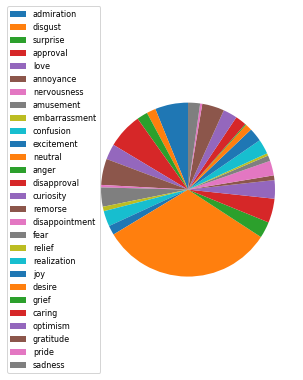

In [5]:
import matplotlib.pyplot as plt

emotion_count = {}

for emotion_loop in all_emotions:
    emotion_count[emotion_loop]= len([x for x in posts if x.emotion == emotion_loop])
        
labels = []
sizes = []

for x, y in emotion_count.items():
    labels.append(x)
    sizes.append(y)

patches, texts = plt.pie(sizes,startangle=90)
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

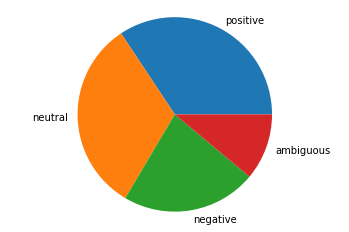

In [6]:
sent_count = {}

for sent_loop in all_sentiments:
    sent_count[sent_loop]= len([x for x in posts if x.sentiment == sent_loop])

labels = []
sizes = []

for x, y in sent_count.items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

## 2.1 Proccessing Dataset 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer


#getting frequency of each word 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x.post for x in posts)
#print("Vocabulary: ", vectorizer.vocabulary_)


In [8]:
print(f" The number of tokens is {len(vectorizer.vocabulary_)}") # no. of distinct words 

 The number of tokens is 30449


## 2.2 Train/Test split  

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np


training_set, testing_set = train_test_split(posts, test_size=0.2, random_state = 42) 
# what this does is randomly splitting the posts list of objects into 80/20 train/test respectively,  

train_x = np.array([x.post for x in training_set]) # now we need to seperate our x's and y's for both train and split tests
train_emotion_y = np.array([x.emotion for x in training_set]) # this is the y you feed to your model
train_sentiment_y = [x.sentiment for x in training_set] # same thing ^

test_x = [x.post for x in testing_set]
test_emotion_y = [x.emotion for x in testing_set]
test_sentiment_y = [x.sentiment for x in testing_set]


vectorized_train_x = vectorizer.fit_transform(train_x) # this is the x you feed to your model 
vectorized_test_x = vectorizer.transform(test_x) # dw about this for now 

# 2.3 Train and test classifiers

### 2.3.1 Base-MNB - Emotion

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnb_emotion = MultinomialNB()

#mnb_fit_emotion = mnb_emotion.fit(vectorized_train_x,train_emotion_y) # training the data


In [11]:
import joblib
#joblib.dump(mnb_fit_emotion, 'models/base_MNB_emotion.pkl')
base_MNB_emotion = joblib.load('models/base_MNB_emotion.pkl')
y_pred_mnb_emotion = base_MNB_emotion.predict(vectorized_test_x)


print("Predictions for emotions =", y_pred_mnb_emotion)
print("score of model 1 on emotions = ", base_MNB_emotion.score(vectorized_test_x,test_emotion_y))

Predictions for emotions = ['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'admiration']
score of model 1 on emotions =  0.3835991153532767


### 2.3.1 Base-MNB - Sentiment

In [12]:
mnb_sentiment = MultinomialNB()
#mnb_fit_sentiment = mnb_sentiment.fit(vectorized_train_x,train_sentiment_y)


#joblib.dump(mnb_fit_sentiment, 'models/base_MNB_sentiment.pkl')
base_MNB_sentiment = joblib.load('models/base_MNB_sentiment.pkl')


y_pred_mnb_sentiment =base_MNB_sentiment.predict(vectorized_test_x)
print("\nPredictions for sentiments =", y_pred_mnb_sentiment)
print("score of model 2 on sentiment = ", base_MNB_sentiment.score(vectorized_test_x,test_sentiment_y))


Predictions for sentiments = ['positive' 'ambiguous' 'neutral' ... 'neutral' 'neutral' 'positive']
score of model 2 on sentiment =  0.5469386567337912


### 2.3.2 Base-DT - EMOTION

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_emotion = DecisionTreeClassifier()
#dt_emotion_fit = dt_emotion.fit(vectorized_train_x,train_emotion_y)

#joblib.dump(dt_emotion_fit, 'models/base_DT_emotion.pkl')
base_DT_emotion = joblib.load('models/base_DT_emotion.pkl')

y_pred_dt_emotion =  base_DT_emotion.predict(vectorized_test_x)
dt_emotion_score = base_DT_emotion.score(vectorized_test_x,test_emotion_y)

print("Predictions for emotions with decision tree =", y_pred_dt_emotion)
print("\nscore of model 1 on emotions with decision tree = ",dt_emotion_score)


Predictions for emotions with decision tree = ['optimism' 'confusion' 'neutral' ... 'neutral' 'neutral' 'neutral']

score of model 1 on emotions with decision tree =  0.35979513444302175


### 2.3.2 Base-DT - SENTIMENT

In [14]:
dt_sentiment = DecisionTreeClassifier()
#dt_sentiment_fit = dt_sentiment.fit(vectorized_train_x,train_sentiment_y)

#joblib.dump(dt_sentiment_fit, 'models/base_DT_sentiment.pkl')
base_DT_sentiment = joblib.load('models/base_DT_sentiment.pkl')

y_pred_dt_sentiment = base_DT_sentiment.predict(vectorized_test_x)
dt_sentiment_score = base_DT_sentiment.score(vectorized_test_x,test_sentiment_y)
print("\nPredictions for sentiments with decision tree =", y_pred_dt_sentiment)
print("score of model 2 on sentiment with decision tree = ", dt_sentiment_score)


Predictions for sentiments with decision tree = ['positive' 'ambiguous' 'neutral' ... 'neutral' 'neutral' 'neutral']
score of model 2 on sentiment with decision tree =  0.543679431963683


### 2.3.3 Base-MLP - EMOTION

In [15]:
from sklearn.neural_network import MLPClassifier
#mlp_emotion = MLPClassifier(random_state=2, max_iter=1).fit(vectorized_train_x, train_emotion_y)

#joblib.dump(mlp_emotion, 'models/base_MLP_emotion.pkl')
base_MLP_emotion = joblib.load('models/base_MLP_emotion.pkl')

y_pred_mlp_emotion = base_MLP_emotion.predict(vectorized_test_x)

mlp_emotion_score = base_MLP_emotion.score(vectorized_test_x,test_emotion_y)
mlp_emotion_score 

0.4376091258293563

### 2.3.3 Base-MLP - SENTIMENT

In [16]:
#mlp_sentiment = MLPClassifier(random_state=2, max_iter=1).fit(vectorized_train_x, train_sentiment_y)


#joblib.dump(mlp_sentiment, 'models/base_MLP_sentiment.pkl')
base_MLP_sentiment = joblib.load('models/base_MLP_sentiment.pkl')


y_pred_mlp_sentiment = base_MLP_sentiment.predict(vectorized_test_x)
mlp_sentiment_score = base_MLP_sentiment.score(vectorized_test_x,test_sentiment_y)
mlp_sentiment_score

0.5653008962868118

### 2.3.4 Top - MNB - EMOTION

In [17]:

from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.5, 0, 1, 2]}
TOP_mnb_emotion = MultinomialNB()
grid_emotion_mnb = GridSearchCV(TOP_mnb_emotion, param_grid, n_jobs = -1,verbose=2)

#grid_emotion_mnb = grid_emotion_mnb.fit(vectorized_train_x,train_emotion_y)

#joblib.dump(grid_emotion_mnb, 'models/top_MNB_emotion.pkl')
top_MNB_emotion = joblib.load('models/top_MNB_emotion.pkl')
print(top_MNB_emotion.best_params_)


{'alpha': 0.5}


In [18]:
y_pred_TOPmnb_emotion = top_MNB_emotion.predict(vectorized_test_x)
top_MNB_emotion.score(vectorized_test_x,test_emotion_y)

0.3908450704225352

### 2.3.4 Top - MNB - SENTIMENT

In [19]:
TOP_mnb_sentiment = MultinomialNB()

grid_sentiment_mnb = GridSearchCV(TOP_mnb_sentiment, param_grid,n_jobs = -1, verbose=2)
#grid_sentiment_mnb = grid_sentiment_mnb.fit(vectorized_train_x,train_sentiment_y)



#joblib.dump(grid_sentiment_mnb, 'models/top_MNB_sentiment.pkl')
top_MNB_sentiment = joblib.load('models/top_MNB_sentiment.pkl')
print(top_MNB_sentiment.best_params_)

{'alpha': 1}


In [20]:
y_pred_TOPmnb_sentiment = top_MNB_sentiment.predict(vectorized_test_x)

top_MNB_sentiment.score(vectorized_test_x,test_sentiment_y)

0.5469386567337912

### 2.3.5 Top-DT - EMOTION


In [21]:
param_grid_DT = {"criterion":["gini","entropy"],"max_depth":[5,10] , "min_samples_split":[5,10,20]}
dt_emotion_top = DecisionTreeClassifier()
grid_dt_emotion = GridSearchCV(dt_emotion_top, param_grid_DT, n_jobs = -1 , verbose=2)

#grid_dt_emotion = grid_dt_emotion.fit(vectorized_train_x,train_emotion_y)


#joblib.dump(grid_dt_emotion, 'models/top_DT_emotion.pkl')
top_DT_emotion = joblib.load('models/top_DT_emotion.pkl')
top_DT_emotion.best_params_


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [22]:
print(top_DT_emotion.score(vectorized_test_x,test_emotion_y))
y_pred_TOPdt_emotion = top_DT_emotion.predict(vectorized_test_x)

0.39046676754743337


### 2.3.5 Top-DT - SENTIMENT


In [23]:
dt_sentiment_top = DecisionTreeClassifier()
grid_dt_sentiment = GridSearchCV(dt_sentiment_top, param_grid_DT, n_jobs = -1,verbose=2)
#grid_dt_sentiment= grid_dt_sentiment.fit(vectorized_train_x,train_sentiment_y)


#joblib.dump(grid_dt_sentiment, 'models/top_DT_sentiment.pkl')
top_DT_sentiment = joblib.load('models/top_DT_sentiment.pkl')
top_DT_sentiment.best_params_


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [24]:
print(top_DT_sentiment.score(vectorized_test_x,test_sentiment_y))
y_pred_TOPdt_sentiment = top_DT_sentiment.predict(vectorized_test_x)

0.4248632289605401


### 2.3.6 TOP - MLP - EMOTION

In [25]:
param_grid_mlp= {'activation':["logistic","tanh","relu","identity"],"hidden_layer_sizes":[(30,50),(10,10,10)],"solver":['sgd','adam']}
mlp_emotion_top =  MLPClassifier(random_state=2, max_iter=1)
grid_mlp_emotion = GridSearchCV(mlp_emotion_top, param_grid_mlp, n_jobs = -1,verbose=2)

#grid_mlp_emotion = grid_mlp_emotion.fit(vectorized_train_x,train_emotion_y)


#joblib.dump(grid_mlp_emotion, 'models/top_MLP_emotion.pkl')
top_MLP_emotion = joblib.load('models/top_MLP_emotion.pkl')
top_MLP_emotion.best_params_


{'activation': 'identity', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [26]:
print(top_MLP_emotion.score(vectorized_test_x,test_emotion_y))
y_pred_TOPmlp_emotion = top_MLP_emotion.predict(vectorized_test_x)

0.4318181818181818


### 2.3.6 TOP - MLP - SENTIMENT

In [27]:
mlp_sentiment_top =  MLPClassifier(random_state=2, max_iter=1)
grid_mlp_sentiment  = GridSearchCV(mlp_sentiment_top, param_grid_mlp,n_jobs = -1, verbose=2)
#grid_mlp_sentiment = grid_mlp_sentiment.fit(vectorized_train_x,train_sentiment_y)



In [28]:
#joblib.dump(grid_mlp_sentiment, 'models/top_MLP_sentiment.pkl')
top_MLP_sentiment = joblib.load('models/top_MLP_sentiment.pkl')
top_MLP_sentiment.best_params_


{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [29]:
print(top_MLP_sentiment.score(vectorized_test_x,test_sentiment_y))
y_pred_TOPmlp_sentiment = top_MLP_sentiment.predict(vectorized_test_x)

0.5658829007100454


# 2.4 Performance

In [30]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### BASE MNB 

In [31]:
def write_to_file(conf,clas, file, title): # expects conf. matrix, classification report, file path and title as 
    with open(file, 'a') as f: # "a" appends text to file
        f.write(f"{title}\n\nConfusion Matrix: \n{conf}\n\nCLassification Report: \n{clas}\n\n\n")
    return None

In [32]:
open("performance.txt", "w").close() #clears file (ensures file is empty when before it starts)

mnb_matrix_emotion = confusion_matrix(test_emotion_y,y_pred_mnb_emotion)
mnb_clas_emotion = classification_report(test_emotion_y, y_pred_mnb_emotion)

write_to_file(mnb_matrix_emotion,mnb_clas_emotion, 'performance.txt',' BASE MNB - EMOTION')

mnb_matrix_sentiment = confusion_matrix(test_sentiment_y,y_pred_mnb_sentiment)
mnb_clas_sentiment = classification_report(test_sentiment_y, y_pred_mnb_sentiment)

write_to_file(mnb_matrix_sentiment,mnb_clas_sentiment, 'performance.txt',' BASE MNB - SENTIMENT')

### BASE DT 

In [33]:
dt_matrix_emotion = confusion_matrix(test_emotion_y,y_pred_dt_emotion)
dt_clas_emotion = classification_report(test_emotion_y, y_pred_dt_emotion)

write_to_file(dt_matrix_emotion,dt_clas_emotion, 'performance.txt',' BASE DT - EMOTION')

dt_matrix_sentiment = confusion_matrix(test_sentiment_y,y_pred_dt_sentiment)
dt_clas_sent = classification_report(test_sentiment_y, y_pred_dt_sentiment)

write_to_file(dt_matrix_sentiment,dt_clas_sent, 'performance.txt',' BASE DT - SENTIMENT')

### BASE MLP 

In [34]:
mlp_matrix_emotion = confusion_matrix(test_emotion_y,y_pred_mlp_emotion)
mlp_clas_emotion = classification_report(test_emotion_y, y_pred_mlp_emotion)

write_to_file(mlp_matrix_emotion,mlp_clas_emotion, 'performance.txt',' BASE MLP - EMOTION')

mlp_matrix_sentiment = confusion_matrix(test_sentiment_y,y_pred_mlp_sentiment)
mlp_clas_sentiment = classification_report(test_sentiment_y, y_pred_mlp_sentiment)

write_to_file(mlp_matrix_sentiment,mlp_clas_sentiment, 'performance.txt',' BASE MLP - SENTIMENT')


### TOP MNB 

In [35]:
TOPmnb_matrix_emotion = confusion_matrix(test_emotion_y, y_pred_TOPmnb_emotion)
TOPmnb_clas_emotion = classification_report(test_emotion_y, y_pred_TOPmnb_emotion)

write_to_file(TOPmnb_matrix_emotion,TOPmnb_clas_emotion, 'performance.txt',' TOP MNB - EMOTION')

TOPmnb_matrix_sentiment = confusion_matrix(test_sentiment_y, y_pred_TOPmnb_sentiment)
TOPmnb_clas_sent = classification_report(test_sentiment_y, y_pred_TOPmnb_sentiment)

write_to_file(TOPmnb_matrix_sentiment,TOPmnb_clas_sent, 'performance.txt',' TOP MNB - SENTIMENT')

### TOP DT 

In [36]:
TOPdt_matrix_emotion = confusion_matrix(test_emotion_y, y_pred_TOPdt_emotion)
TOPdt_clas_emotion = classification_report(test_emotion_y, y_pred_TOPdt_emotion)

write_to_file(TOPdt_matrix_emotion,TOPdt_clas_emotion, 'performance.txt',' TOP DT - EMOTION')

TOPdt_matrix_sentiment = confusion_matrix(test_sentiment_y, y_pred_TOPdt_sentiment)
TOPdt_clas_sentiment = classification_report(test_sentiment_y, y_pred_TOPdt_sentiment)

write_to_file(TOPdt_matrix_sentiment,TOPdt_clas_sentiment, 'performance.txt',' TOP DT - SENTIMENT')

### TOP MLP 

In [37]:
TOPmlp_matrix_emotion = confusion_matrix(test_emotion_y, y_pred_TOPmlp_emotion)
TOPmlp_clas_emotion = classification_report(test_emotion_y, y_pred_TOPmlp_emotion)

write_to_file(TOPmlp_matrix_emotion,TOPmlp_clas_emotion, 'performance.txt',' TOP MLP - EMOTION')


# TOPmlp_matrix_sentiment = confusion_matrix(test_sentiment_y, y_pred_TOPmlp_sentiment)
# TOPmlp_clas_sentiment = classification_report(test_sentiment_y, y_pred_TOPmlp_sentiment)

#write_to_file(TOPmlp_matrix_sentiment,TOPmlp_clas_sentiment, 'performance.txt',' TOP MLP - SENTIMENT')


# 2.5 Remove Stopwords and redo 2.3


In [38]:
# Processing Data with removal of stop words

from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer(stop_words='english')
X_stopW = coun_vect.fit_transform(x.post for x in posts)
#print("Vocabulary: ", coun_vect.vocabulary_)

In [39]:
print(f" The number of tokens is {len(coun_vect.vocabulary_)}") # it was 30449 before

 The number of tokens is 30148


In [40]:
# making new training set and testing set

coun_vect_train_x = coun_vect.fit_transform(train_x) 
coun_vect_test_x = coun_vect.transform(test_x) 

### Base-MNB


In [41]:
mnb_emotion_stopW = MultinomialNB()
mnb_sentiment_stopW = MultinomialNB()
#mnb_fit_emotion_stopW = mnb_emotion_stopW.fit(coun_vect_train_x,train_emotion_y)
#mnb_fit_sentiment_stopW = mnb_sentiment_stopW.fit(coun_vect_train_x,train_sentiment_y)


In [42]:
#joblib.dump(mnb_fit_emotion_stopW, 'models/base_MNB_emotion_stopW.pkl')
base_MNB_emotion_stopW = joblib.load('models/base_MNB_emotion_stopW.pkl')

#joblib.dump(mnb_fit_sentiment_stopW, 'models/base_MNB_sentiment_stopW.pkl')
base_MNB_sentiment_stopW = joblib.load('models/base_MNB_sentiment_stopW.pkl')

In [43]:

y_pred_mnb_emotion_stopW = base_MNB_emotion_stopW.predict(coun_vect_test_x)
y_pred_mnb_sentiment_stopW = base_MNB_sentiment_stopW.predict(coun_vect_test_x)


print("Predictions for emotions =", y_pred_mnb_emotion_stopW)
print("\nPredictions for sentiments =", y_pred_mnb_sentiment_stopW)

print("\nscore of model 1 on emotions = ", base_MNB_emotion_stopW.score(coun_vect_test_x,test_emotion_y))
print("score of model 2 on sentiment = ", base_MNB_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y))

Predictions for emotions = ['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'optimism']

Predictions for sentiments = ['positive' 'neutral' 'neutral' ... 'neutral' 'neutral' 'positive']

score of model 1 on emotions =  0.3884297520661157
score of model 2 on sentiment =  0.5415551158188803


### Base-DT


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_emotion_stopW = DecisionTreeClassifier()
dt_sentiment_stopW = DecisionTreeClassifier()
#dt_emotion_fit_stopW = dt_emotion_stopW.fit(coun_vect_train_x,train_emotion_y)
#dt_sentiment_fit_stopW = dt_sentiment_stopW.fit(coun_vect_train_x,train_sentiment_y)


In [45]:
#joblib.dump(dt_emotion_fit_stopW, 'models/base_DT_emotion_stopW.pkl')
base_DT_emotion_stopW = joblib.load('models/base_DT_emotion_stopW.pkl')

#joblib.dump(dt_sentiment_fit_stopW, 'models/base_DT_sentiment_stopW.pkl')
base_DT_sentiment_stopW = joblib.load('models/base_DT_sentiment_stopW.pkl')

In [46]:
y_pred_dt_emotion_stopW =  base_DT_emotion_stopW.predict(coun_vect_test_x)
y_pred_dt_sentiment_stopW = base_DT_sentiment_stopW.predict(coun_vect_test_x)

dt_emotion_score_stopW = base_DT_emotion_stopW.score(coun_vect_test_x,test_emotion_y)
dt_sentiment_score_stopW = base_DT_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y)

print("Predictions for emotions with decision tree =", y_pred_dt_emotion_stopW)
print("\nPredictions for sentiments with decision tree =", y_pred_dt_sentiment_stopW)
print("\nscore of model 1 on emotions with decision tree = ",dt_emotion_score_stopW)
print("score of model 2 on sentiment with decision tree = ", dt_sentiment_score_stopW)

Predictions for emotions with decision tree = ['optimism' 'confusion' 'neutral' ... 'neutral' 'neutral' 'neutral']

Predictions for sentiments with decision tree = ['positive' 'ambiguous' 'neutral' ... 'neutral' 'neutral' 'neutral']

score of model 1 on emotions with decision tree =  0.3610173437318124
score of model 2 on sentiment with decision tree =  0.5440286346176231


### Base-MLP

In [47]:
#joblib.dump(mlp_emotion_stopW, 'models/base_MLP_emotion_stopW.pkl')
base_MLP_emotion_stopW = joblib.load('models/base_MLP_emotion_stopW.pkl')

#joblib.dump(mlp_sentiment_stopW, 'models/base_MLP_sentiment_stopW.pkl')
base_MLP_sentiment_stopW = joblib.load('models/base_MLP_sentiment_stopW.pkl')

In [48]:
from sklearn.neural_network import MLPClassifier
#mlp_emotion_stopW = MLPClassifier(random_state=2, max_iter=1).fit(coun_vect_train_x, train_emotion_y)
y_pred_mlp_emotion_stopW = base_MLP_emotion_stopW.predict(coun_vect_test_x)

#mlp_sentiment_stopW = MLPClassifier(random_state=2, max_iter=1).fit(coun_vect_train_x, train_sentiment_y)
y_pred_mlp_sentiment_stopW = base_MLP_sentiment_stopW.predict(coun_vect_test_x)



In [49]:

mlp_emotion_score_stopW = base_MLP_emotion_stopW.score(coun_vect_test_x,test_emotion_y)
print("\nScore for emotion with base-MLP =", mlp_emotion_score_stopW)

mlp_sentiment_score_stopW = base_MLP_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y)
print("\nScore for sentiment with base-MLP =", mlp_sentiment_score_stopW)


Score for emotion with base-MLP = 0.43833663135839834

Score for sentiment with base-MLP = 0.5625945757187755


### Top - MNB

In [50]:

from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [0.5, 0, 1, 2]}
TOP_mnb_emotion_stopW = MultinomialNB()
TOP_mnb_sentiment_stopW = MultinomialNB()

grid_emotion_mnb_stopW = GridSearchCV(TOP_mnb_emotion_stopW, param_grid, verbose=2)
grid_sentiment_mnb_stopW = GridSearchCV(TOP_mnb_sentiment_stopW, param_grid, verbose=2)

#grid_emotion_mnb_stopW= grid_emotion_mnb_stopW.fit(coun_vect_train_x,train_emotion_y)
#grid_sentiment_mnb_stopW =grid_sentiment_mnb_stopW.fit(coun_vect_train_x,train_sentiment_y)

#joblib.dump(grid_emotion_mnb_stopW, 'models/top_MNB_emotion_stopW.pkl')
top_MNB_emotion_stopW = joblib.load('models/top_MNB_emotion_stopW.pkl')

#joblib.dump(grid_sentiment_mnb_stopW, 'models/top_MNB_sentiment_stopW.pkl')
top_MNB_sentiment_stopW = joblib.load('models/top_MNB_sentiment_stopW.pkl')

In [51]:
y_pred_TOPmnb_emotion_stopW = top_MNB_emotion_stopW.predict(coun_vect_test_x)
TOPmnb_emotion_labels_stopW = set(y_pred_TOPmnb_emotion_stopW)
y_pred_TOPmnb_sentiment_stopW = top_MNB_sentiment_stopW.predict(coun_vect_test_x)
TOPmnb_sentiment_labels_stopW = set(y_pred_TOPmnb_sentiment_stopW)

top_MNB_emotion_score_stopW = top_MNB_emotion_stopW.score(coun_vect_test_x,test_emotion_y)
print("\nScore for emotion with top-MNB =", top_MNB_emotion_score_stopW)
top_MNB_sentiment_score_stopW = top_MNB_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y)
print("\nScore for sentiment with top-MNB =", top_MNB_sentiment_score_stopW)



Score for emotion with top-MNB = 0.393143987894308

Score for sentiment with top-MNB = 0.5415551158188803


### Top-DT


In [52]:

#joblib.dump(grid_dt_emotion_stopW, 'models/top_DT_emotion_stopW.pkl')
top_DT_emotion_stopW = joblib.load('models/top_DT_emotion_stopW.pkl')

#joblib.dump(grid_dt_sentiment_stopW, 'models/top_DT_sentiment_stopW.pkl')
top_DT_sentiment_stopW = joblib.load('models/top_DT_sentiment_stopW.pkl')

In [53]:
param_grid_DT = {"criterion":["gini","entropy"],"max_depth":[5,10] , "min_samples_split":[5,10,20]}

dt_emotion_top_stopW = DecisionTreeClassifier()
grid_dt_emotion_stopW = GridSearchCV(dt_emotion_top_stopW, param_grid_DT, n_jobs = -1 , verbose=2)
#grid_dt_emotion_stopW = grid_dt_emotion_stopW.fit(coun_vect_train_x,train_emotion_y)
print(top_DT_emotion_stopW.best_params_)



dt_sentiment_top_stopW = DecisionTreeClassifier()
grid_dt_sentiment_stopW = GridSearchCV(dt_sentiment_top_stopW, param_grid_DT, n_jobs = -1,verbose=2)
#grid_dt_sentiment_stopW = grid_dt_sentiment_stopW.fit(coun_vect_train_x,train_sentiment_y)
top_DT_sentiment_stopW.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [54]:
grid_dt_emotion_score_stopW= (top_DT_emotion_stopW.score(coun_vect_test_x,test_emotion_y))
y_pred_TOPdt_emotion_stopW = top_DT_emotion_stopW.predict(coun_vect_test_x)

print("\nScore for emotion with top-DT =", grid_dt_emotion_score_stopW)

grid_dt_sentiment_score_stopW= (top_DT_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y))
y_pred_TOPdt_sentiment_stopW = top_DT_sentiment_stopW.predict(coun_vect_test_x)
print("\nScore for sentiment with top-DT =", grid_dt_sentiment_score_stopW)


Score for emotion with top-DT = 0.391136072634152

Score for sentiment with top-DT = 0.4250378302875102


### Top-MLP


In [55]:

#joblib.dump(grid_mlp_emotion_stopW, 'models/top_MLP_emotion_stopW.pkl')
top_MLP_emotion_stopW = joblib.load('models/top_MLP_emotion_stopW.pkl')

#joblib.dump(grid_mlp_sentiment_stopW, 'models/top_MLP_sentiment_stopW.pkl')
top_MLP_sentiment_stopW = joblib.load('models/top_MLP_sentiment_stopW.pkl')

In [56]:
param_grid_mlp= {'activation':["logistic","tanh","relu","identity"],"hidden_layer_sizes":[(30,50),(10,10,10)],"solver":['sgd','adam']}
mlp_emotion_top_stopW =  MLPClassifier(random_state=2, max_iter=1)
grid_mlp_emotion_stopW = GridSearchCV(mlp_emotion_top_stopW, param_grid_mlp, n_jobs = -1,verbose=2)

#grid_mlp_emotion_stopW= grid_mlp_emotion_stopW.fit(coun_vect_train_x,train_emotion_y)

top_MLP_emotion_stopW.best_params_


mlp_sentiment_top_stopW =  MLPClassifier(random_state=2, max_iter=1)
grid_mlp_sentiment_stopW  = GridSearchCV(mlp_sentiment_top_stopW, param_grid_mlp,n_jobs = -1, verbose=2)
#grid_mlp_sentiment_stopW =grid_mlp_sentiment_stopW.fit(coun_vect_train_x,train_sentiment_y)

top_MLP_sentiment_stopW.best_params_




{'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}

In [57]:
grid_mlp_emotion_score_stopW= (top_MLP_emotion_stopW.score(coun_vect_test_x,test_emotion_y))
y_pred_TOPmlp_emotion_stopW = top_MLP_emotion_stopW.predict(coun_vect_test_x)
print("\nScore for emotion with top-MLP =", grid_mlp_emotion_score_stopW)

grid_mlp_sentiment_score_stopW = (top_MLP_sentiment_stopW.score(coun_vect_test_x,test_sentiment_y))
y_pred_TOPmlp_sentiment_stopW = top_MLP_sentiment_stopW.predict(coun_vect_test_x)
print("\nScore for sentiment with top-MLP =", grid_mlp_sentiment_score_stopW)


Score for emotion with top-MLP = 0.43018856943312767

Score for sentiment with top-MLP = 0.5649807938540333
